In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
n = 100
X = 10*np.random.rand(n,1)
Y = X ** 2 + 30*np.random.rand(n,1)

Var: 850.5827114328495
SD: 29.164751180712127
Correlation:
 [[1.         0.93616885]
 [0.93616885 1.        ]]


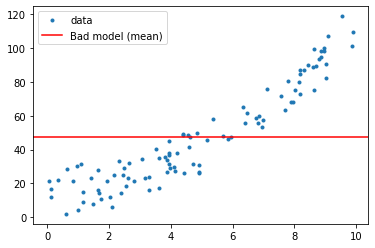

In [3]:
bad_model = np.mean(Y)
print("Var:", np.var(Y))
print("SD:", np.std(Y))
print("Correlation:\n", np.corrcoef(np.hstack([X,Y]).T))

plt.plot(X, Y, '.', label="data")
plt.axhline(y=bad_model, linestyle='-', color="r", label="Bad model (mean)")
plt.legend()
plt.show()

In [4]:
model = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_t = poly.fit(X)
X_poly = poly_t.transform(X)
model.fit(X_poly, Y)
mse = mean_squared_error(Y, model.predict(X_poly))
print("R2:", model.score(X_poly, Y))
print("MSE:", mse)
print("Error esperado:", np.sqrt(mse))

R2: 0.9257370255558834
MSE: 63.166802161745046
Error esperado: 7.947754535826144


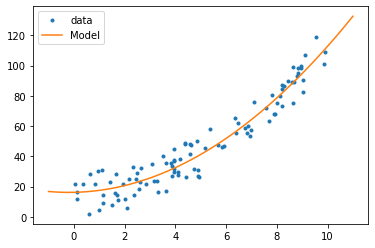

In [5]:
n_new = 50
X_new = np.linspace(-1,11,n_new).reshape(n_new,1)
plt.plot(X, Y, '.', label="data")
plt.plot(X_new, model.predict(poly_t.transform(X_new)), '-', label="Model")
plt.legend()
plt.show()

Var: 850.5827114328495
SD: 29.164751180712127
Correlation:
 [[1.         0.97091129 0.93616885]
 [0.97091129 1.         0.96211453]
 [0.93616885 0.96211453 1.        ]]


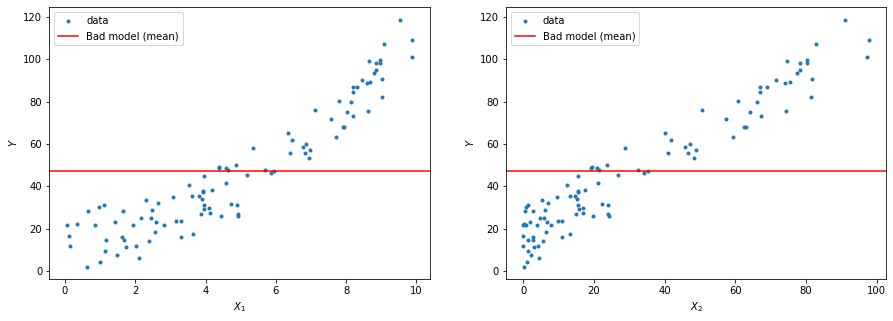

In [6]:
bad_model = np.mean(Y)
X2 = X**2
#X2 = 10*np.random.rand(n,1)

X_trans = np.hstack([X, X2])
print("Var:", np.var(Y))
print("SD:", np.std(Y))
print("Correlation:\n", np.corrcoef(np.hstack([X_trans,Y]).T))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(X_trans[:,0], Y, '.', label="data")
plt.axhline(y=bad_model, linestyle='-', color="r", label="Bad model (mean)")
plt.xlabel("$X_1$")
plt.ylabel("$Y$")
plt.legend()
plt.subplot(122)
plt.plot(X_trans[:,1], Y, '.', label="data")
plt.axhline(y=bad_model, linestyle='-', color="r", label="Bad model (mean)")
plt.xlabel("$X_2$")
plt.ylabel("$Y$")
plt.legend()
plt.show()

In [7]:
model = LinearRegression()
model.fit(X_trans, Y)
mse = mean_squared_error(Y, model.predict(X_trans))
print("R2:", model.score(X_trans, Y))
print("MSE:", mse)
print("Error esperado:", np.sqrt(mse))

R2: 0.9257370255558834
MSE: 63.166802161745046
Error esperado: 7.947754535826144


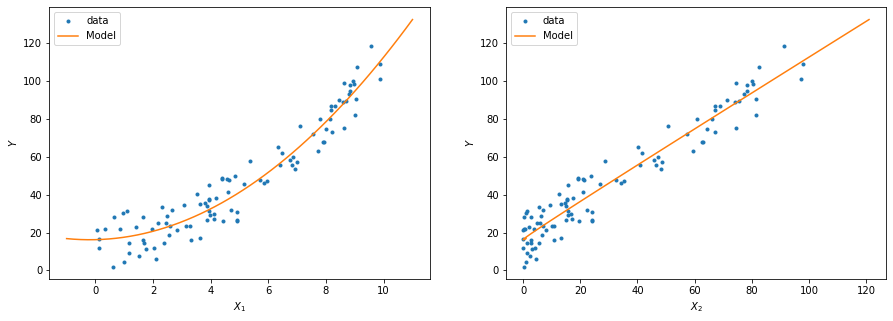

In [8]:
n_new = 50
X_new = np.linspace(-1,11,n_new).reshape(n_new,1)
X2_new = X_new ** 2
#X2_new = np.linspace(-1,11,n_new).reshape(n_new,1)
Xt_new = np.hstack([X_new, X2_new])

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(X_trans[:,0], Y, '.', label="data")
plt.plot(Xt_new[:,0], model.predict(Xt_new), "-", label="Model")
plt.xlabel("$X_1$")
plt.ylabel("$Y$")
plt.legend()
plt.subplot(122)
plt.plot(X_trans[:,1], Y, '.', label="data")
plt.plot(Xt_new[:,1], model.predict(Xt_new), "-", label="Model")
plt.xlabel("$X_2$")
plt.ylabel("$Y$")
plt.legend()
plt.show()

## 2. Altura y Peso

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.distributions.empirical_distribution import ECDF

In [10]:
data = pd.read_csv("./weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
reshape = lambda S : S.values.reshape(len(S), 1)
X = reshape(data["Height"])
y = reshape(data["Weight"])

In [12]:
m = np.mean(y)
print("Mean:", m)
print("STD:", np.std(y))
print("Var:", np.var(y))
print("Corr:\n", data.corr())

Mean: 161.44035683283076
STD: 32.106833544431716
Var: 1030.8487602498458
Corr:
           Height    Weight
Height  1.000000  0.924756
Weight  0.924756  1.000000


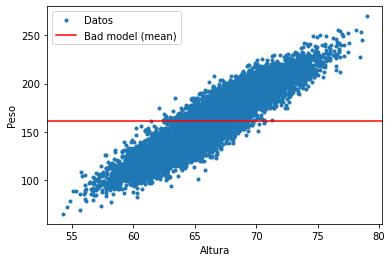

In [13]:
plt.plot(X, y, '.', label="Datos")
plt.axhline(y=m, linestyle='-', color='r', label='Bad model (mean)')
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.legend()
plt.show()

In [14]:
model = LinearRegression()
model.fit(X, y)

y_predicts = model.predict(X)
mse = mean_squared_error(y, y_predicts)
print("R2:", model.score(X, y))
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

R2: 0.8551742120609958
MSE: 149.29348394912964
RMSE: 12.218571272826035


In [15]:
print(model.coef_)
print(model.intercept_)

[[7.71728764]]
[-350.73719181]


$$peso(altura) = -350.73 + 7.71*altura$$

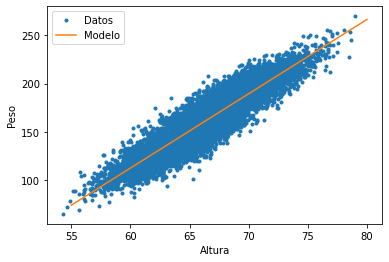

In [16]:
n_new = 100
X_new = np.linspace(55,80, n_new).reshape(n_new, 1)

plt.plot(X, y, '.', label="Datos")
plt.plot(X_new, model.predict(X_new), '-', label="Modelo")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.legend()

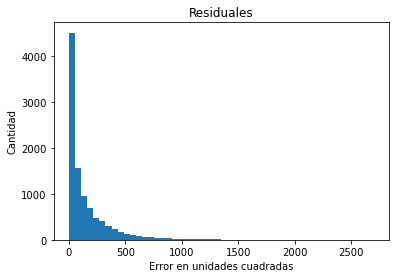

In [17]:
residuals = (y - model.predict(X)) ** 2

plt.hist(residuals, 50)
plt.xlabel("Error en unidades cuadradas")
plt.ylabel("Cantidad")
plt.title("Residuales")
plt.show()

In [18]:
print("Expected error:", np.sqrt(np.std(residuals)), "libras")

Expected error: 14.514775552254806 libras


In [19]:
lib = 20
cdf = ECDF(residuals.T[0,:])
print("Probabilidad de que el error sea menor a {} libras:\n{}".format(lib, cdf(lib**2)))

Probabilidad de que el error sea menor a 20 libras:
0.9006000000000001


## 3. Regresión no lineal

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
data = pd.read_csv("data.csv")
data = data.sort_values("X")
data.head()

,X,Y
58,-10.0,-2864.066134
122,-9.9,-3155.674688
174,-9.8,-3059.316968
54,-9.7,-2671.320895
119,-9.6,-3316.663750


In [22]:
X = reshape(data["X"])
y = reshape(data["Y"])

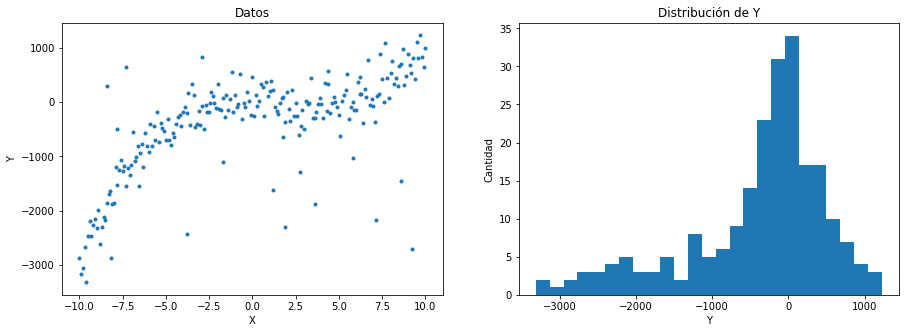

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(X, y, '.')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos")

plt.subplot(122)
plt.hist(y, 25)
plt.title("Distribución de Y")
plt.xlabel("Y")
plt.ylabel("Cantidad")
plt.show()

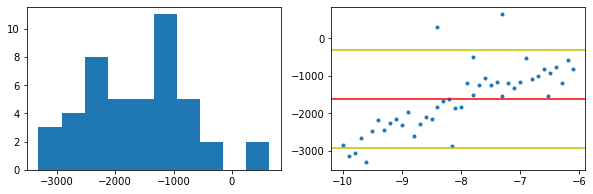

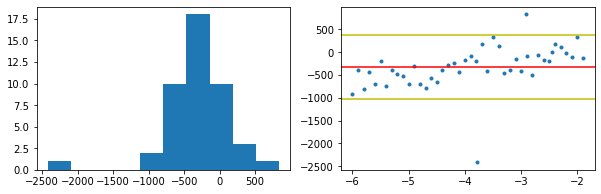

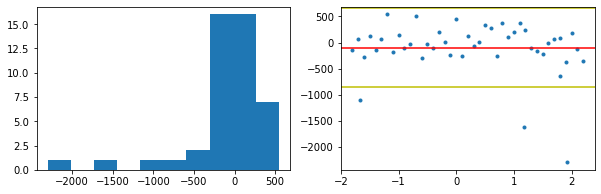

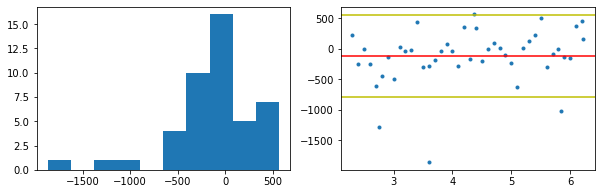

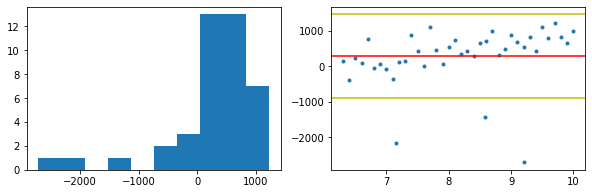

In [55]:
i = 1
step = int(len(data) / 5) + 1
inliers = list()
for q in range(0, len(data), step):
    segment = data.iloc[q:i*step]
    
    std = np.std(segment["Y"])
    cutoff = 1.5*std
    mean = np.mean(segment["Y"])
    
    plt.figure(figsize=(10,3))
    plt.subplot(122)
    plt.plot(segment["X"], segment["Y"], '.', label="Datos locales")
    plt.axhline(y=mean, linestyle='-', color="r", label="Promedio")
    plt.axhline(y=mean+cutoff, linestyle='-', color="y", label="Datos no outliers")
    plt.axhline(y=mean-cutoff, linestyle='-', color="y")
    plt.subplot(121)
    plt.hist(segment["Y"])
    plt.show()
    
    for t in segment["Y"]:
        if t >= mean - cutoff and t <= mean + cutoff:
            inliers.append(1)
        else:
            inliers.append(-1)
    i += 1

inliers = np.array(inliers)
clean_data = data[inliers==1]
X = reshape(clean_data["X"])
y = reshape(clean_data["Y"])

In [56]:
print("Tamaño original:", len(data))
print("Tamaño nuevo:", len(clean_data))
print("Se eleiminaro:", len(data) - len(clean_data))

Tamaño original: 221
Tamaño nuevo: 204
Se eleiminaro: 17


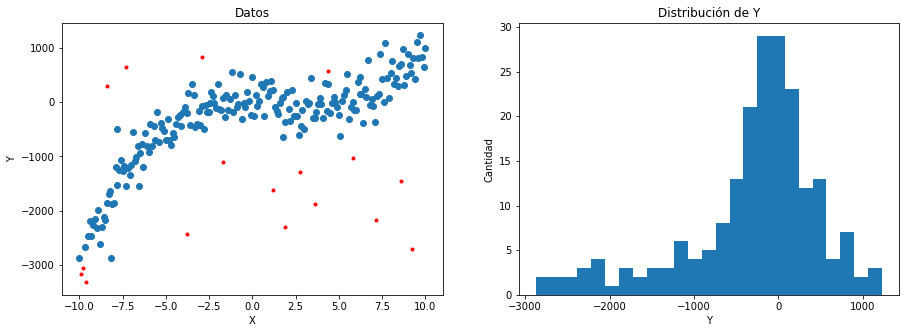

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(data["X"], data["Y"], '.', c='r')
plt.plot(X, y, 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos")

plt.subplot(122)
plt.hist(y, 25)
plt.title("Distribución de Y")
plt.xlabel("Y")
plt.ylabel("Cantidad")
plt.show()

In [58]:
m = np.mean(y)
print("Mean:", m)
print("STD:", np.std(y))
print("Var:", np.var(y))
print("Corr:\n", data.corr())

Mean: -300.2387632880349
STD: 806.2237146924688
Var: 649996.6781325232
Corr:
           X         Y
X  1.000000  0.659872
Y  0.659872  1.000000


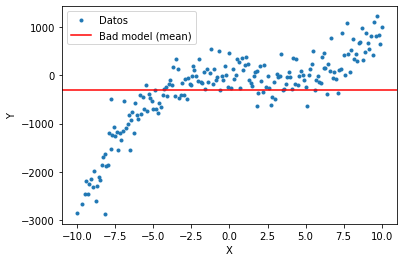

In [59]:
plt.plot(X, y, '.', label="Datos")
plt.axhline(y=m, linestyle='-', color='r', label='Bad model (mean)')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [60]:
model = LinearRegression()
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X)
X_poly = poly.transform(X)
model.fit(X_poly, y)

y_predicts = model.predict(X_poly)
mse = mean_squared_error(y, y_predicts)
print("R2:", model.score(X_poly, y))
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

R2: 0.8834935754731521
MSE: 75728.78892354865
RMSE: 275.1886424319664


In [61]:
print(model.coef_)
print(model.intercept_)

[[-8.26584155 -9.57710898  2.08261461]]
[-2.95449706]


$$y(x) = -6.44887576 + -6.21038404x - 9.28130254x^2 + 2.03113577x^3$$

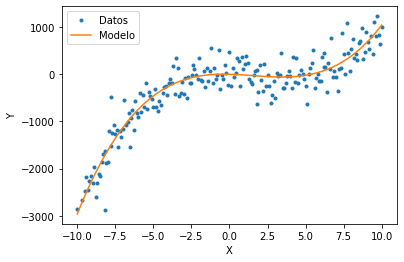

In [62]:
n_new = 100
X_new = np.linspace(-10,10, n_new).reshape(n_new, 1)

plt.plot(X, y, '.', label="Datos")
plt.plot(X_new, model.predict(poly.transform(X_new)), '-', label="Modelo")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

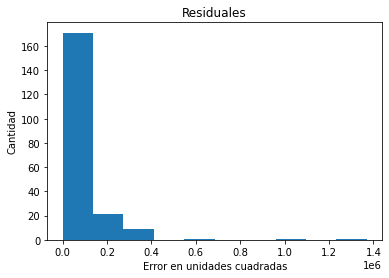

In [44]:
residuals = (y - model.predict(X_poly)) ** 2

plt.hist(residuals)
plt.xlabel("Error en unidades cuadradas")
plt.ylabel("Cantidad")
plt.title("Residuales")
plt.show()

In [45]:
print("Expected error:", np.sqrt(np.std(residuals)), "unidades")

Expected error: 382.8557986475167 unidades


In [46]:
units = 500
cdf = ECDF(residuals.T[0,:])
print("Probabilidad de que el error sea menor a {} unidades:\n{}".format(units, cdf(units**2)))

Probabilidad de que el error sea menor a 500 unidades:
0.926470588235294
